In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [108]:
data = pd.read_csv('quotes/TGKA_150101_200417.csv', parse_dates=['<DATE>'])

In [109]:
data.columns = [d[1:-1].lower() for d in data.columns]

In [130]:
data['sma'] = data.close.rolling(window=7).mean()
# data['sma'] = data.close.ewm(span=9, adjust=False).mean()
data['dev'] = data.close - data.sma
data['sigma'] = data.close.rolling(window=7).std(ddof=0)
data['upper'] = data.sma + 2 * data.sigma
data['lower'] = data.sma - 2 * data.sigma

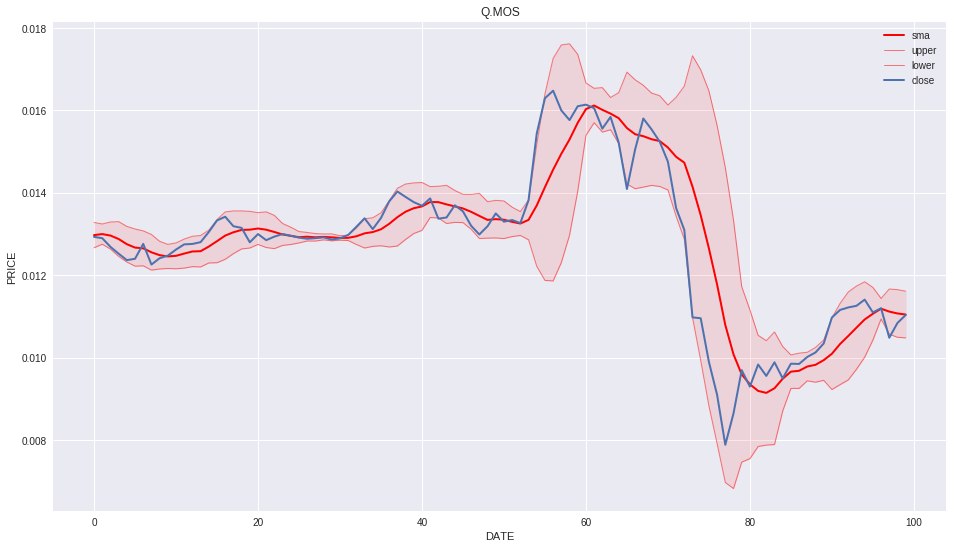

In [147]:
n = 100
plt.figure(figsize=(16, 9))
plt.plot(range(n), data.sma[-n:], color='red', linewidth=2)
plt.plot(range(n), data.upper[-n:], color='red', alpha=0.5, linewidth=1)
plt.plot(range(n), data.lower[-n:], color='red', alpha=0.5, linewidth=1)
plt.fill_between(range(100), data.upper[-n:], data.lower[-n:], color='red', alpha=0.1)
plt.plot(range(n), data.close[-n:], linewidth=2)
plt.title('Q.MOS')
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [30]:
data['deal'] = np.nan

In [31]:
data.tail()

,ticker,per,date,time,open,high,low,close,vol,sma,dev,deal
1328,TGKA,D,2020-04-13,0,0.011444,0.011476,0.010840,0.011100,8935700000,0.011067,0.000033,NaN
1329,TGKA,D,2020-04-14,0,0.011250,0.011338,0.011162,0.011202,4020900000,0.011190,0.000012,NaN
1330,TGKA,D,2020-04-15,0,0.011180,0.011180,0.010376,0.010486,17529900000,0.011120,-0.000634,NaN
1331,TGKA,D,2020-04-16,0,0.010598,0.011164,0.010170,0.010844,20456400000,0.011075,-0.000231,NaN
1332,TGKA,D,2020-04-17,0,0.011000,0.011238,0.010704,0.011036,12411500000,0.011048,-0.000012,NaN


In [32]:
ingame = False

for i in range(8, len(data)-1):
    if ingame is False and data.dev[i-2] < 0 and data.dev[i-1] >= 0:
        data.loc[i, 'deal'] = 'in'
        ingame = True
    if ingame is True and data.dev[i-1] < 0:
        data.loc[i, 'deal'] = 'out'
        ingame = False

In [33]:
x = 10
n = 3
data[n*x:(n+1)*x]

,ticker,per,date,time,open,high,low,close,vol,sma,dev,deal
30,TGKA,D,2015-02-17,0,0.00450,0.00450,0.00439,0.00442,2052000000,0.004326,0.000094,NaN
31,TGKA,D,2015-02-18,0,0.00446,0.00449,0.00440,0.00449,852800000,0.004361,0.000129,NaN
32,TGKA,D,2015-02-19,0,0.00446,0.00448,0.00429,0.00440,1934700000,0.004381,0.000019,NaN
33,TGKA,D,2015-02-20,0,0.00445,0.00462,0.00439,0.00462,2368400000,0.004449,0.000171,NaN
34,TGKA,D,2015-02-24,0,0.00452,0.00470,0.00429,0.00455,1567100000,0.004491,0.000059,NaN
35,TGKA,D,2015-02-25,0,0.00460,0.00470,0.00450,0.00469,7340500000,0.004524,0.000166,NaN
36,TGKA,D,2015-02-26,0,0.00472,0.00500,0.00465,0.00487,16769200000,0.004577,0.000293,NaN
37,TGKA,D,2015-02-27,0,0.00493,0.00500,0.00475,0.00488,3608400000,0.004643,0.000237,NaN
38,TGKA,D,2015-03-02,0,0.00489,0.00489,0.00476,0.00480,634000000,0.004687,0.000113,NaN
39,TGKA,D,2015-03-03,0,0.00480,0.00483,0.00470,0.00475,1858800000,0.004737,0.000013,NaN


In [34]:
deals = data[data.deal.notna()].copy()

In [35]:
deals['profit'] = deals.open.rolling(window=2).apply(lambda x: (x[1] - x[0]) / x[0], raw=True)
deals['total'] = deals.profit + 1

In [36]:
deals = deals[deals['deal'] == 'out'].loc[:, ['date', 'profit', 'total']]
deals.index = range(len(deals))
deals.dropna(inplace=True)

In [37]:
print('Win: ', len(deals[deals.profit > 0]))
print('Lose: ', len(deals[deals.profit <= 0]))
print('Percent of win: ', round(len(deals[deals.profit > 0]) * 100 / len(deals), 2), '\b%')
print('Sharp: ', round(deals.profit.mean() / deals.profit.std(), 2))

Win:  50
Lose:  87
Percent of win:  36.5 %
Sharp:  0.18


In [38]:
print('Min: ', min(deals.profit * 10000))
print('Max: ', max(deals.profit * 10000))
print('Sum: ', sum(deals.profit * 10000) + 10000)
print('')

Min:  -563.6478784040543
Max:  6263.5135135135115
Sum:  29457.152405611076



In [39]:
res = 10000
lowest = np.inf

for p in deals.profit:
    res += res * p
    if lowest > res:
        lowest = res
    
print('\nCumsum: ', res)
print('Lowest: ', lowest)  


Cumsum:  49592.549630512854
Lowest:  9510.211145725165


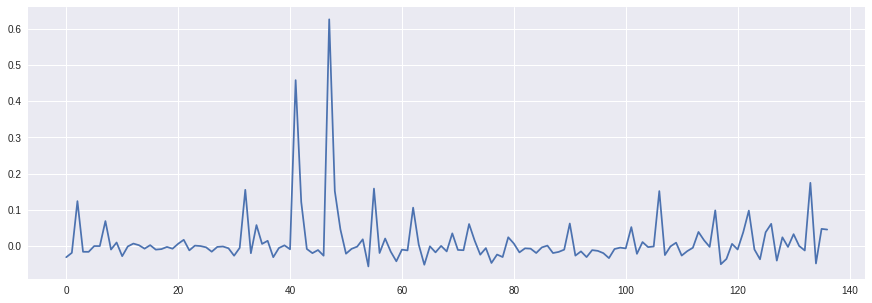

In [40]:
plt.figure(figsize=(15, 5))
plt.plot(range(len(deals)), deals.profit)